<a href="https://colab.research.google.com/github/vedica1011/NLP_BERT_TL/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import string, os
import re
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
import string
import re

In [ ]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)

In [ ]:
chat_data = pd.read_excel("topical_chat.csv.xlsx")

In [ ]:
chat_data = chat_data.dropna()
chat_data.isnull().sum()

conversation_id    0
message            0
sentiment          0
dtype: int64

In [ ]:
def clean_text(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

In [ ]:
chat_data['message'] = chat_data['message'].apply(lambda x:str(x).lower())
chat_data['message'] = chat_data['message'].apply(lambda x: clean_text(str(x)))

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(chat_data['message'])
X = tokenizer.texts_to_sequences(chat_data['message'])

In [ ]:
max_sequence_length = max(len(sequence) for sequence in X)
max_sequence_length

127

In [ ]:
X_padded = pad_sequences(X, maxlen=max_sequence_length)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(chat_data['sentiment'])
#y_train_one_hot = tf.keras.utils.to_categorical(y,num_classes=chat_data['sentiment'].nunique())

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

42082

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,GRU,Bidirectional

embedding_dim = 100
num_classes = 9
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(GRU(units=128, dropout=0.2, recurrent_dropout=0.2)))

model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 127, 100)          4208200   
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               176640    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 4387153 (16.74 MB)
Trainable params: 4387153 (16.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, callbacks=[early_stopping])


Epoch 1/10
2355/2355 [==============================] - 1987s 841ms/step - loss: 1.2960 - accuracy: 0.4757 - val_loss: 1.2507 - val_accuracy: 0.4890
Epoch 2/10
2355/2355 [==============================] - 1960s 832ms/step - loss: 1.1693 - accuracy: 0.5363 - val_loss: 1.2323 - val_accuracy: 0.5000
Epoch 3/10
2355/2355 [==============================] - 1958s 831ms/step - loss: 1.0699 - accuracy: 0.5829 - val_loss: 1.2819 - val_accuracy: 0.4873
Epoch 4/10
2355/2355 [==============================] - 1955s 830ms/step - loss: 0.9665 - accuracy: 0.6290 - val_loss: 1.3447 - val_accuracy: 0.4871
Epoch 5/10
2355/2355 [==============================] - 1929s 819ms/step - loss: 0.8717 - accuracy: 0.6664 - val_loss: 1.4477 - val_accuracy: 0.4772


In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

1178/1178 [==============================] - 103s 87ms/step - loss: 1.2323 - accuracy: 0.5000
Validation Loss: 1.2322641611099243
Validation Accuracy: 0.49996018409729004


1178/1178 [==============================] - 96s 81ms/step


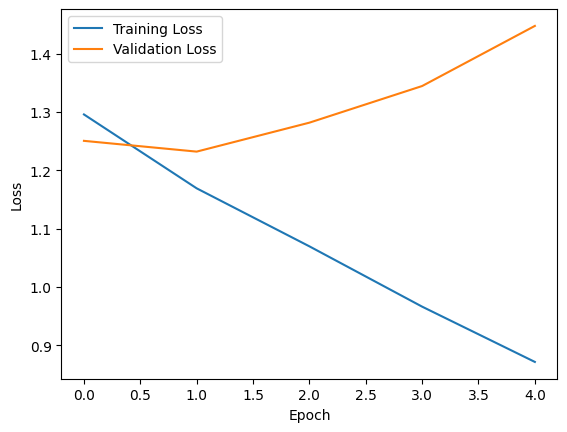

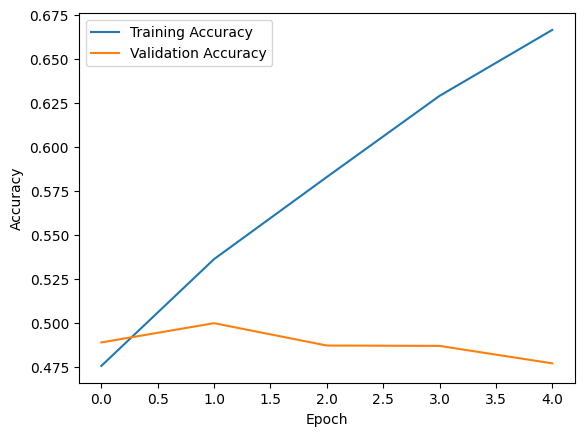

In [ ]:
predictions = model.predict(X_val)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()